In [1]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cellpose.io import imread

/home/mou/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
BASE_PATH = "../Data/Cellpose/Sartorius"
train_dir = osp.join(BASE_PATH, "train")
train_df = pd.read_csv(osp.join(train_dir, "train.csv"))

In [3]:
s_train_df = train_df[train_df["cell_type"] == "shsy5y"].reset_index()
a_train_df = train_df[train_df["cell_type"] == "astro"].reset_index()
c_train_df = train_df[train_df["cell_type"] == "cort"].reset_index()

In [4]:
s_train_df

,index,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
...,...,...,...,...,...,...,...,...,...,...
37558,51567,fe3e30f849f4,325220 1 325904 7 325922 4 326607 23 327311 24...,704,520,shsy5y,11h30m00s,2019-06-15,shsy5y[diff]_D10-4_Vessel-714_Ph_3,0 days 11:30:00
37559,51568,fe3e30f849f4,202720 1 203422 3 204125 4 204827 6 205529 7 2...,704,520,shsy5y,11h30m00s,2019-06-15,shsy5y[diff]_D10-4_Vessel-714_Ph_3,0 days 11:30:00
37560,51569,fe3e30f849f4,301277 2 301978 5 302679 9 303377 15 304081 15...,704,520,shsy5y,11h30m00s,2019-06-15,shsy5y[diff]_D10-4_Vessel-714_Ph_3,0 days 11:30:00
37561,51570,fe3e30f849f4,122042 2 122743 5 123446 6 124148 8 124850 10 ...,704,520,shsy5y,11h30m00s,2019-06-15,shsy5y[diff]_D10-4_Vessel-714_Ph_3,0 days 11:30:00


In [5]:
a_train_df

,index,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,395,0140b3c8f445,32499 3 33201 7 33902 9 34604 10 35306 11 3600...,704,520,astro,09h00m00s,2020-09-13,astros[cereb]_F8-3_Vessel-361_Ph_4,0 days 09:00:00
1,396,0140b3c8f445,59836 2 60538 5 61241 6 61945 6 62648 6 63352 ...,704,520,astro,09h00m00s,2020-09-13,astros[cereb]_F8-3_Vessel-361_Ph_4,0 days 09:00:00
2,397,0140b3c8f445,175738 6 176440 10 177142 14 177847 15 178552 ...,704,520,astro,09h00m00s,2020-09-13,astros[cereb]_F8-3_Vessel-361_Ph_4,0 days 09:00:00
3,398,0140b3c8f445,685 13 1389 15 2093 17 2798 17 3504 16 4211 14...,704,520,astro,09h00m00s,2020-09-13,astros[cereb]_F8-3_Vessel-361_Ph_4,0 days 09:00:00
4,399,0140b3c8f445,195501 11 196203 15 196908 16 197614 17 198319...,704,520,astro,09h00m00s,2020-09-13,astros[cereb]_F8-3_Vessel-361_Ph_4,0 days 09:00:00
...,...,...,...,...,...,...,...,...,...,...
6555,51207,fe33dfcf4ebd,183642 8 184338 22 185038 29 185738 33 186439 ...,704,520,astro,13h00m00s,2020-09-15,astro[hippo]_F2-4_Vessel-361_Ph_1,0 days 13:00:00
6556,51208,fe33dfcf4ebd,678 27 1382 27 2086 27 2790 27 3495 26 4199 26...,704,520,astro,13h00m00s,2020-09-15,astro[hippo]_F2-4_Vessel-361_Ph_1,0 days 13:00:00
6557,51209,fe33dfcf4ebd,116028 12 116730 19 117432 25 118134 28 118838...,704,520,astro,13h00m00s,2020-09-15,astro[hippo]_F2-4_Vessel-361_Ph_1,0 days 13:00:00
6558,51210,fe33dfcf4ebd,96122 1 96826 2 97529 3 98233 3 98936 4 99640 ...,704,520,astro,13h00m00s,2020-09-15,astro[hippo]_F2-4_Vessel-361_Ph_1,0 days 13:00:00


In [6]:
c_train_df

,index,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,503,01ae5a43a2ab,241026 3 241726 9 242427 13 243130 14 243834 1...,704,520,cort,13h30m00s,2020-11-04,cort[oka-high]_B5-1_Vessel-377_Ph_1,0 days 13:30:00
1,504,01ae5a43a2ab,285578 7 286280 11 286982 14 287685 16 288389 ...,704,520,cort,13h30m00s,2020-11-04,cort[oka-high]_B5-1_Vessel-377_Ph_1,0 days 13:30:00
2,505,01ae5a43a2ab,261872 3 262573 7 263275 9 263978 11 264681 12...,704,520,cort,13h30m00s,2020-11-04,cort[oka-high]_B5-1_Vessel-377_Ph_1,0 days 13:30:00
3,506,01ae5a43a2ab,259036 5 259739 8 260443 9 261146 10 261850 11...,704,520,cort,13h30m00s,2020-11-04,cort[oka-high]_B5-1_Vessel-377_Ph_1,0 days 13:30:00
4,507,01ae5a43a2ab,191468 8 192170 11 192872 13 193574 16 194277 ...,704,520,cort,13h30m00s,2020-11-04,cort[oka-high]_B5-1_Vessel-377_Ph_1,0 days 13:30:00
...,...,...,...,...,...,...,...,...,...,...
7444,51136,fbb4fbe7100d,217273 4 217977 9 218680 12 219384 13 220087 1...,704,520,cort,13h30m00s,2020-11-04,cort[oka-high]_B5-3_Vessel-377_Ph_1,0 days 13:30:00
7445,51137,fbb4fbe7100d,232976 5 233678 8 234380 11 235077 18 235779 2...,704,520,cort,13h30m00s,2020-11-04,cort[oka-high]_B5-3_Vessel-377_Ph_1,0 days 13:30:00
7446,51138,fbb4fbe7100d,357933 8 358636 9 359339 10 360041 13 360744 1...,704,520,cort,13h30m00s,2020-11-04,cort[oka-high]_B5-3_Vessel-377_Ph_1,0 days 13:30:00
7447,51139,fbb4fbe7100d,141131 3 141831 9 142532 14 143235 16 143939 1...,704,520,cort,13h30m00s,2020-11-04,cort[oka-high]_B5-3_Vessel-377_Ph_1,0 days 13:30:00


In [7]:
simg = imread(osp.join(train_dir, "{}.tif".format(s_train_df.loc[0, "id"])))
slbl = imread(osp.join(train_dir, "{}_mask.tif".format(s_train_df.loc[0, "id"])))

In [8]:
aimg = imread(osp.join(train_dir, "{}.tif".format(a_train_df.loc[0, "id"])))
albl = imread(osp.join(train_dir, "{}_mask.tif".format(a_train_df.loc[0, "id"])))

In [9]:
cimg = imread(osp.join(train_dir, "{}.tif".format(c_train_df.loc[0, "id"])))
clbl = imread(osp.join(train_dir, "{}_mask.tif".format(c_train_df.loc[0, "id"])))

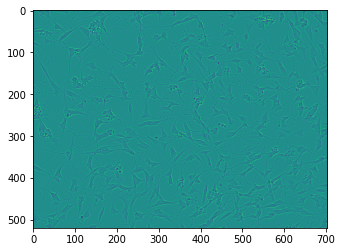

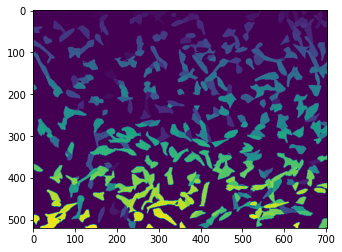

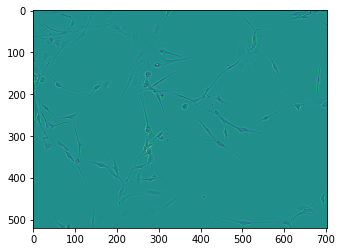

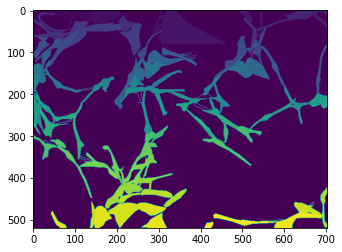

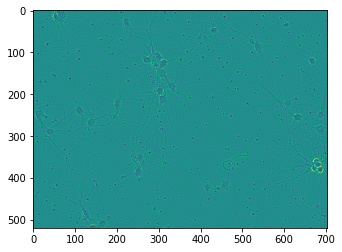

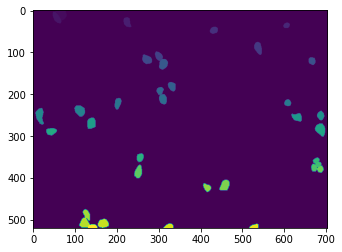

In [10]:
plt.figure()
plt.imshow(simg[:,:,0])
plt.figure()
plt.imshow(slbl[0])

plt.figure()
plt.imshow(aimg[:,:,0])
plt.figure()
plt.imshow(albl[0])

plt.figure()
plt.imshow(cimg[:,:,0])
plt.figure()
plt.imshow(clbl[0])